In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv(r"C:\Users\USER\AppData\Local\Temp\Temp1_archive.zip\CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [72]:
df.shape

(4340, 8)

In [73]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [74]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [75]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [76]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Maruti Swift Dzire VDI                 69
Maruti Alto 800 LXI                    59
Maruti Alto LXi                        47
Maruti Alto LX                         35
Hyundai EON Era Plus                   35
                                       ..
Maruti Esteem VX                        1
Chevrolet Optra Magnum 2.0 LS BSIII     1
Tata New Safari 3L Dicor LX 4x2         1
Honda City Edge Edition Diesel SV       1
Honda Civic 1.8 (E) MT                  1
Name: name, Length: 1491, dtype: int64


2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64


300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
1331000      1
479000       1
1290000      1
746000     

In [77]:
df.nunique().to_frame("NO. of Unique Value")

,NO. of Unique Value
name,1491
year,27
selling_price,445
km_driven,770
fuel,5
seller_type,3
transmission,2
owner,5


In [78]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


1. year column left skewed and selling_price and km_driven right skewed.
2. outlier present these columns

In [79]:
df_conti = df[["year","selling_price","km_driven"]]

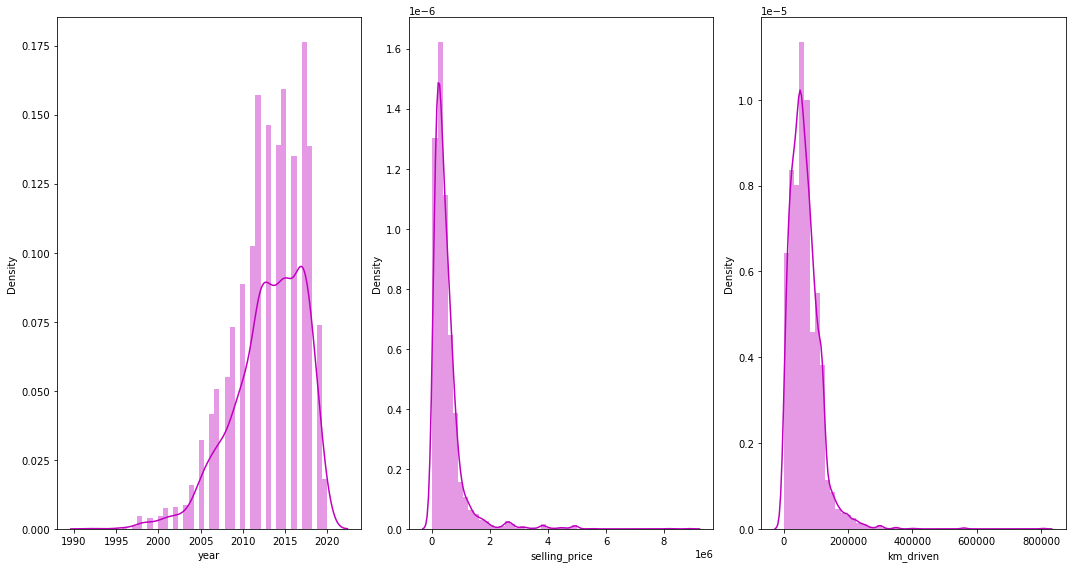

In [80]:
#Let's see the how data is distributed 
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in df_conti:
    if plotnumber<=20:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df_conti[column],color = "m")
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [81]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

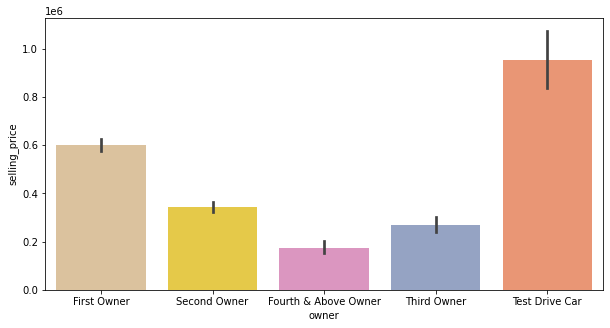

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x = "owner", y = "selling_price", data = df,color = 'm',palette = 'Set2_r')
plt.show()

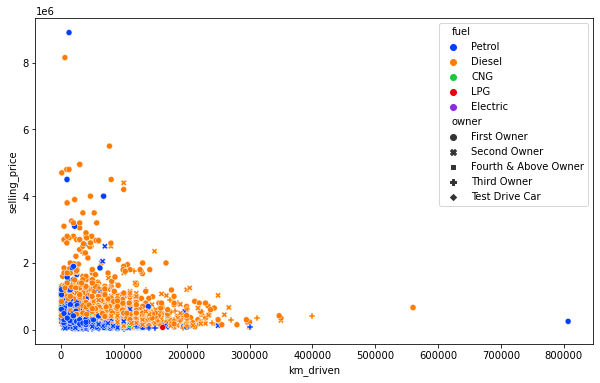

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="km_driven", y="selling_price",hue= 'fuel',data = df,palette='bright', style="owner")
plt.show()

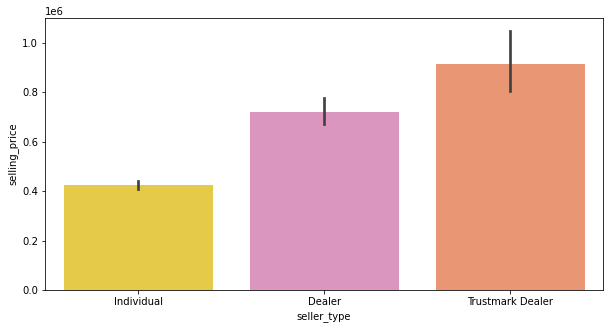

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x = "seller_type", y = "selling_price", data = df,color = 'm',palette = 'Set2_r')
plt.show()

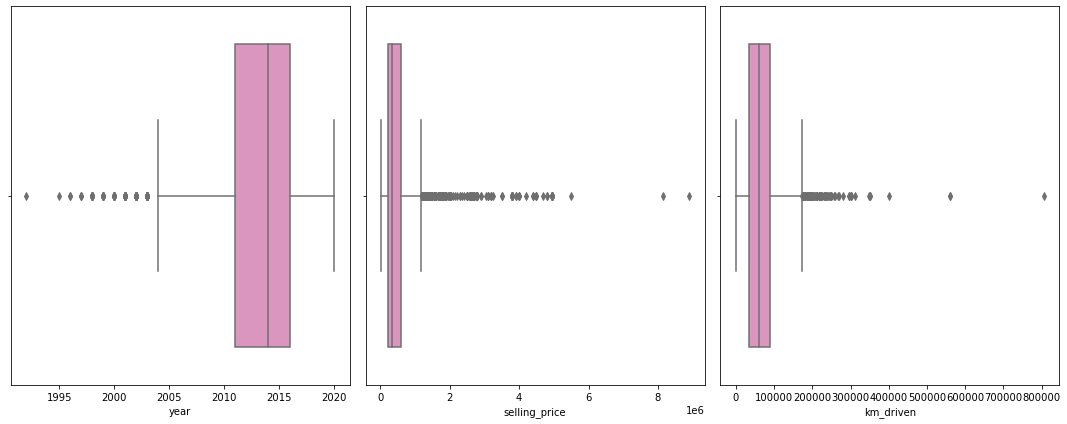

In [85]:
#Let's see the how data is distributed 
plt.figure(figsize=(15,6),facecolor='white')
plotnumber=1
for column in df_conti:
    if plotnumber<=20:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df_conti[column],palette = 'Set2_r')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [86]:
df.skew()

year            -0.833240
selling_price    4.892021
km_driven        2.669057
dtype: float64

In [87]:
df["year"] = np.cbrt(df["year"])

In [88]:
df["selling_price"] = np.cbrt(df["selling_price"])

In [89]:
df["km_driven"] = np.cbrt(df["km_driven"])

In [90]:
df.skew()

year            -0.837383
selling_price    1.175468
km_driven       -0.242568
dtype: float64

In [91]:
df["year"] = np.sqrt(df["year"])

In [92]:
df["selling_price"] = np.sqrt(df["selling_price"])

In [93]:
df.skew()

year            -0.838420
selling_price    0.571373
km_driven       -0.242568
dtype: float64

In [94]:
df["year"] = np.log(df["year"])

In [95]:
df.skew()

year            -0.839458
selling_price    0.571373
km_driven       -0.242568
dtype: float64

In [96]:
from scipy.stats import boxcox
df['selling_price'], _ = boxcox(df['selling_price'])

In [97]:
df.skew()

year            -0.839458
selling_price   -0.001403
km_driven       -0.242568
dtype: float64

I used almost method removing skewness, removed it except year column so I consider -/+ .8 is my threshold value

<AxesSubplot:xlabel='year', ylabel='Density'>

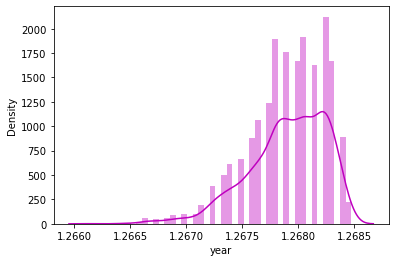

In [98]:
sns.distplot(df["year"],color= "m")

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

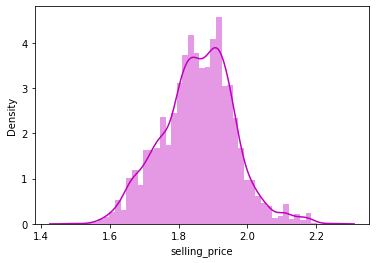

In [99]:
sns.distplot(df["selling_price"],color= "m")

<AxesSubplot:xlabel='km_driven', ylabel='Density'>

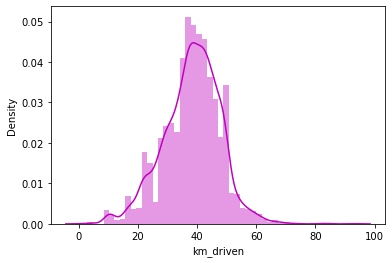

In [100]:
sns.distplot(df["km_driven"],color= "m")

In [101]:
# encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775.0,1.267399,1.630550,41.212853,4.0,1.0,1.0,0.0
1,1041.0,1.267399,1.735976,36.840315,4.0,1.0,1.0,0.0
2,505.0,1.267814,1.925104,46.415888,1.0,1.0,1.0,0.0
3,118.0,1.268228,1.814848,35.830479,4.0,1.0,1.0,0.0
4,279.0,1.267980,1.889105,52.048279,1.0,1.0,1.0,2.0


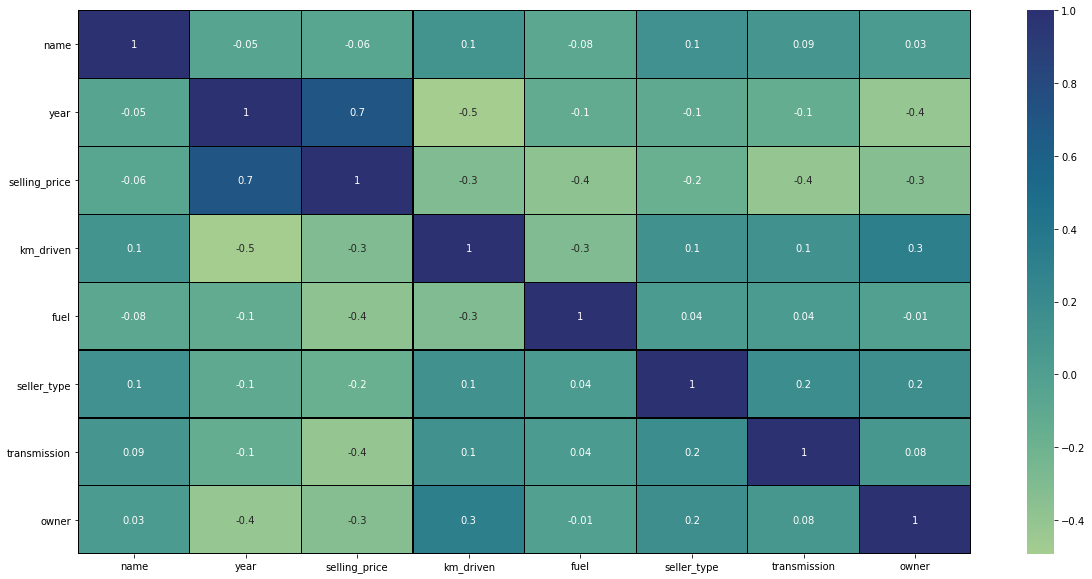

In [102]:
# visualise correlation with heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths = 0.1, fmt = '.1g', linecolor='black',annot = True, cmap = 'crest')
plt.yticks(rotation = 0);
plt.show()

year and selling price are highly correlated with each other

In [103]:
# handle outliers
from scipy.stats import zscore

In [104]:
z = np.abs(df)
z.shape

(4340, 8)

In [105]:
threshold = 3
print (np.where(z>3))

(array([   0,    0,    0, ..., 4339, 4339, 4339], dtype=int64), array([0, 3, 4, ..., 0, 3, 4], dtype=int64))


In [106]:
# functions for detecting outlier(3 std)
def outlier_det(data_frame,feature_name):
    lower_limit=data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_limit=data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return (lower_limit,upper_limit)

In [107]:
outlier_det(df,"selling_price")

(1.5386069130235176, 2.174022118295415)

In [108]:
df[(df["selling_price"]<1.538)|(df["selling_price"]>2.174)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,1097.0,1.268228,2.241465,18.662556,1.0,0.0,0.0,0.0
555,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
574,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
593,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
612,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
900,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
919,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
963,11.0,1.268475,2.176202,11.447142,1.0,1.0,0.0,0.0
1023,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0
1836,39.0,1.268393,2.182380,31.072325,1.0,0.0,0.0,0.0


In [109]:
outlier_det(df,"km_driven")

(9.4322396866092, 67.02405002327822)

In [110]:
df[(df["km_driven"]<9.432)|(df["km_driven"]>67.024)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
69,99.0,1.267648,1.829239,70.472987,1.0,1.0,1.0,2.0
525,939.0,1.268145,1.937920,82.425706,1.0,0.0,1.0,0.0
1243,999.0,1.267565,1.814848,93.086327,4.0,0.0,1.0,0.0
1312,668.0,1.267980,1.814848,1.000000,1.0,1.0,1.0,2.0
1674,1445.0,1.267731,1.857472,67.824229,1.0,1.0,1.0,4.0
1714,243.0,1.268475,1.958373,4.657010,1.0,0.0,1.0,3.0
1715,239.0,1.268475,1.932172,4.657010,4.0,0.0,1.0,3.0
1716,173.0,1.268475,1.988472,4.657010,1.0,0.0,1.0,3.0
2394,1414.0,1.267565,1.857472,70.472987,1.0,1.0,1.0,0.0
3679,1399.0,1.267316,1.874301,73.680630,1.0,1.0,1.0,4.0


In [111]:
outlier_det(df,"year")

(1.2668561520043267, 1.2689519575888064)

In [112]:
df[(df["year"]<1.266)|(df["year"]>1.268)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3,118.0,1.268228,1.814848,35.830479,4.0,1.0,1.0,0.0
6,545.0,1.268145,1.914240,29.240177,4.0,1.0,1.0,0.0
8,390.0,1.268062,1.968388,29.240177,4.0,1.0,1.0,0.0
9,834.0,1.268228,1.862766,42.726587,0.0,1.0,1.0,0.0
10,75.0,1.268062,1.819833,32.710663,4.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
4327,1289.0,1.268062,1.779851,39.148676,4.0,1.0,1.0,2.0
4331,160.0,1.268062,1.909608,55.934447,1.0,1.0,1.0,4.0
4332,692.0,1.268062,1.952872,49.324241,1.0,1.0,1.0,0.0
4338,381.0,1.268145,1.970553,44.814047,1.0,1.0,1.0,0.0


In [113]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df = df[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)]


In [114]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)]

In [115]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

In [116]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775.0,1.267399,1.630550,41.212853,4.0,1.0,1.0,0.0
1,1041.0,1.267399,1.735976,36.840315,4.0,1.0,1.0,0.0
2,505.0,1.267814,1.925104,46.415888,1.0,1.0,1.0,0.0
3,118.0,1.268228,1.814848,35.830479,4.0,1.0,1.0,0.0
4,279.0,1.267980,1.889105,52.048279,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
4335,602.0,1.267980,1.877408,43.088694,1.0,1.0,1.0,2.0
4336,601.0,1.267980,1.877408,43.088694,1.0,1.0,1.0,2.0
4337,777.0,1.267565,1.709527,43.620707,4.0,1.0,1.0,2.0
4338,381.0,1.268145,1.970553,44.814047,1.0,1.0,1.0,0.0
